## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Data Science - British Airways/Data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.shape

(50000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")

In [ ]:
df.describe()

The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

### Sales Channel

Sales Channel Value Counts:
Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64


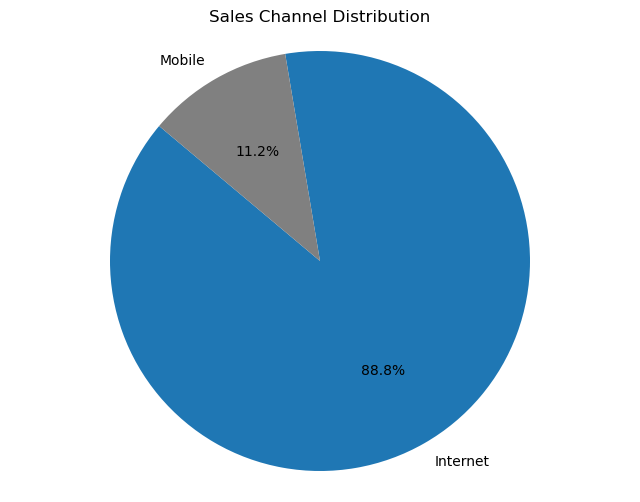

In [5]:
# Calculate the count of each sales channel category
sales_channel_counts = df['sales_channel'].value_counts()

# Print the value counts
print("Sales Channel Value Counts:")
print(sales_channel_counts)

# Extract labels and sizes from the calculated data
labels = sales_channel_counts.index.tolist()
sizes = sales_channel_counts.values.tolist()
colors = ['#1f77b4', '#808080']  # Colors in hexadecimal format

# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Ensuring the pie chart is a perfect circle
plt.title('Sales Channel Distribution')
plt.show()


### Trip Type

In [6]:
# Calculate the count of each trip type category
trip_type_counts = df['trip_type'].value_counts()

# Print the value counts
print("Trip Type Value Counts:")
print(trip_type_counts)

# Extract labels and sizes from the calculated data
labels = trip_type_counts.index.tolist()
sizes = trip_type_counts.values.tolist()

# Print the percentages without pie chart
for label, size in zip(labels, sizes):
    percentage = (size / sum(sizes)) * 100
    print(f"{label}: {percentage:.1f}%")


Trip Type Value Counts:
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64
RoundTrip: 99.0%
OneWay: 0.8%
CircleTrip: 0.2%


### Purchase Lead

<Axes: xlabel='purchase_lead', ylabel='Count'>

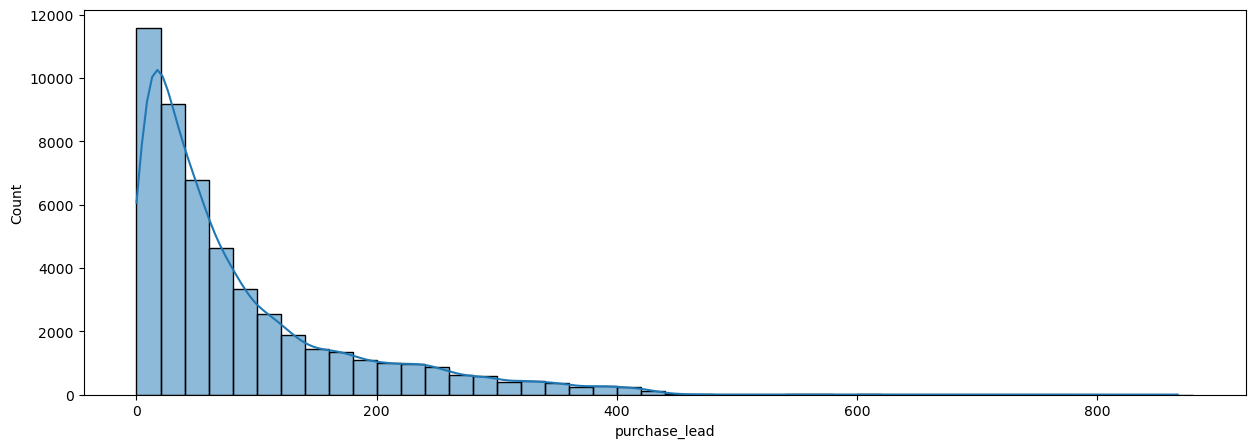

In [7]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20,kde=True)

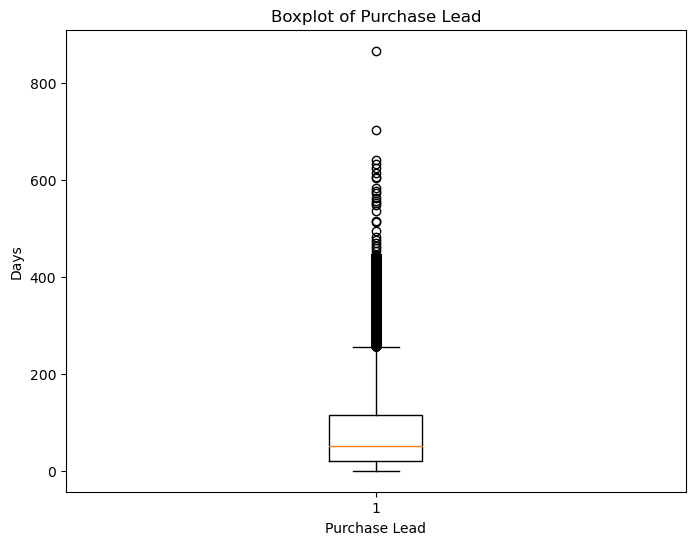

Upper bound for outliers: 397.0
Lower bound for outliers: -261.0


In [8]:
# Creating the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df["purchase_lead"], showfliers=True)
plt.xlabel("Purchase Lead")
plt.ylabel("Days")
plt.title("Boxplot of Purchase Lead")
plt.show()

# Calculating the first quartile (Q1) and third quartile (Q3)
Q1 = df["purchase_lead"].quantile(0.25)
Q3 = df["purchase_lead"].quantile(0.75)

# Calculating the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculating the upper and lower bounds for extreme outliers
upper_bound = Q3 + 3 * IQR
lower_bound = Q1 - 3 * IQR

print("Upper bound for outliers:", upper_bound)
print("Lower bound for outliers:", lower_bound)

Only a few bookings were made more than 1 years and 1 month before the travel date, which is quite uncommon. However, this may be due to two instances of cancellations and rebookings within a 6-month period. While airlines typically allow ticket changes within a year, we'll treat these cases as extreme outliers, with an upper bound set at 397 days. Identifying such extreme outliers is critical as they could substantially affect predictive model outcomes

In [9]:
(df.purchase_lead >397).value_counts()

False    49581
True       419
Name: purchase_lead, dtype: int64

If we assume customers don't book more than about 397 days in advance, we'll remove entries with a purchase_lead exceeding 397 days

In [10]:
#filtering the data to have only purchase lead days less than 397 days
df = df[df.purchase_lead <=397 ]
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


### Length of Stay

<Axes: xlabel='length_of_stay', ylabel='Count'>

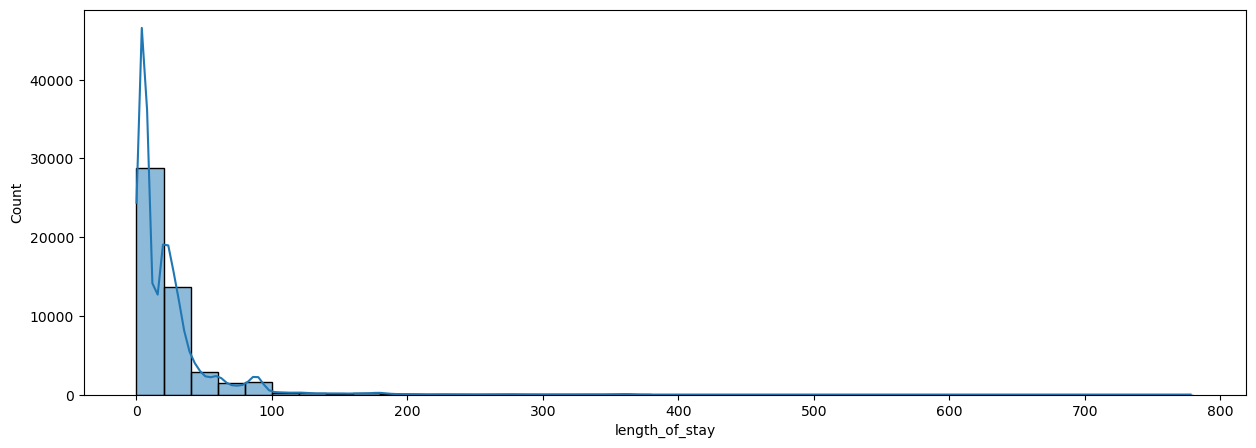

In [11]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="length_of_stay", binwidth=20,kde=True)

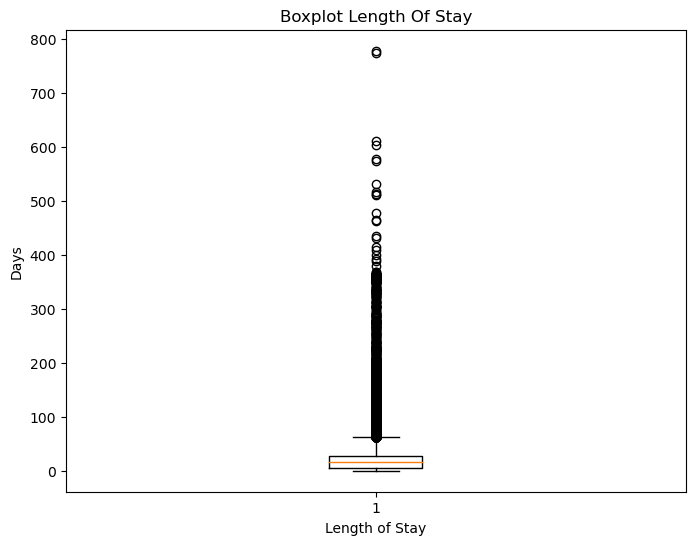

Upper bound for outliers: 97.0
Lower bound for outliers: -64.0


In [12]:
# Creating the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df["length_of_stay"], showfliers=True)
plt.xlabel("Length of Stay")
plt.ylabel("Days")
plt.title("Boxplot Length Of Stay")
plt.show()

# Calculating the first quartile (Q1) and third quartile (Q3)
Q1 = df["length_of_stay"].quantile(0.25)
Q3 = df["length_of_stay"].quantile(0.75)

# Calculating the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculating the upper and lower bounds for extreme outliers
upper_bound = Q3 + 3 * IQR
lower_bound = Q1 - 3 * IQR

print("Upper bound for outliers:", upper_bound)
print("Lower bound for outliers:", lower_bound)

In [13]:
(df.length_of_stay > 97).value_counts()

False    48404
True      1177
Name: length_of_stay, dtype: int64


Out of the total entries after cleaned, there are 1177 outliers with a length of stay exceeding 97 days.

In [14]:
df = df[df.length_of_stay <= 97 ]
df.shape

(48404, 14)

The reason for this is to exclude extreme outliers, ensuring that only data with a length of stay of 97 days or less is retained in the dataset.

### Flight Hour

In [17]:
df["flight_hour"].unique()

array([ 7,  3, 17,  4, 15, 20,  6, 14, 12,  2, 19, 10, 23,  9,  8, 13, 11,
        0,  1,  5, 16, 18, 22, 21], dtype=int64)

If there are no time values greater than 23, it means the data is safe.

### Flight Day

In [18]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

Flight Day Value Counts:
Mon    7819
Wed    7464
Tue    7411
Thu    7209
Fri    6589
Sun    6291
Sat    5621
Name: flight_day, dtype: int64


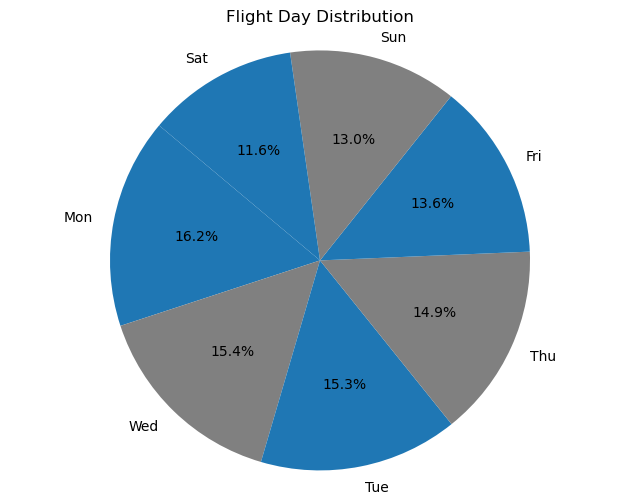

In [19]:
# Calculate the count of each flight day category
flight_day_counts = df['flight_day'].value_counts()

# Print the value counts
print("Flight Day Value Counts:")
print(flight_day_counts)

# Extract labels and sizes from the calculated data
labels = flight_day_counts.index.tolist()
sizes = flight_day_counts.values.tolist()

# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Ensuring the pie chart is a perfect circle
plt.title('Flight Day Distribution')
plt.show()


In [20]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

C:\Users\hp\AppData\Local\Temp\ipykernel_5364\751803089.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["flight_day"] = df["flight_day"].map(mapping)


In [21]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

### Wants Extra Baggage, Wants Preferred Seat, Wants In-flight Meals

Wants Extra Baggage Value Counts:
1    32217
0    16187
Name: wants_extra_baggage, dtype: int64


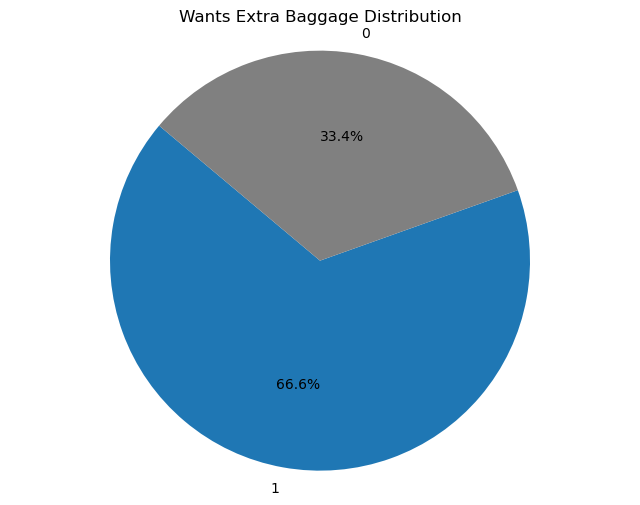

In [22]:
# Calculate the count of each wants extra baggage category
extra_baggage_counts = df['wants_extra_baggage'].value_counts()

# Print the value counts
print("Wants Extra Baggage Value Counts:")
print(extra_baggage_counts)

# Extract labels and sizes from the calculated data
labels = extra_baggage_counts.index.tolist()
sizes = extra_baggage_counts.values.tolist()

# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Ensuring the pie chart is a perfect circle
plt.title('Wants Extra Baggage Distribution')
plt.show()


Wants Preferred Seat Value Counts:
0    34074
1    14330
Name: wants_preferred_seat, dtype: int64


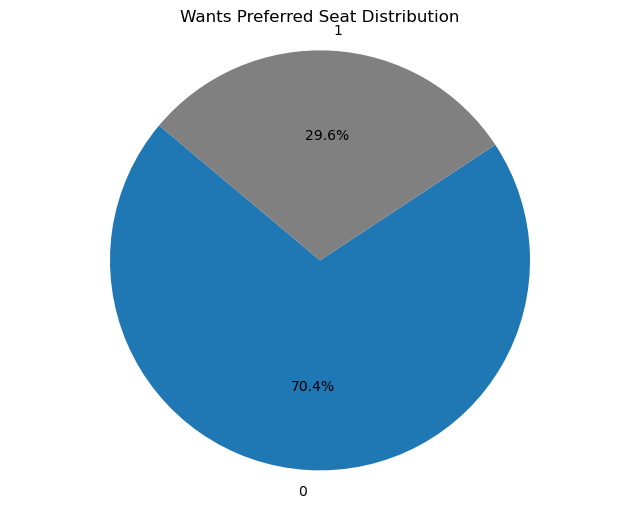

In [23]:
# Calculate the count of each wants preferred seat category
preferred_seat_counts = df['wants_preferred_seat'].value_counts()

# Print the value counts
print("Wants Preferred Seat Value Counts:")
print(preferred_seat_counts)

# Extract labels and sizes from the calculated data
labels = preferred_seat_counts.index.tolist()
sizes = preferred_seat_counts.values.tolist()

# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Ensuring the pie chart is a perfect circle
plt.title('Wants Preferred Seat Distribution')
plt.show()


Wants In-flight Meals Value Counts:
0    27836
1    20568
Name: wants_in_flight_meals, dtype: int64


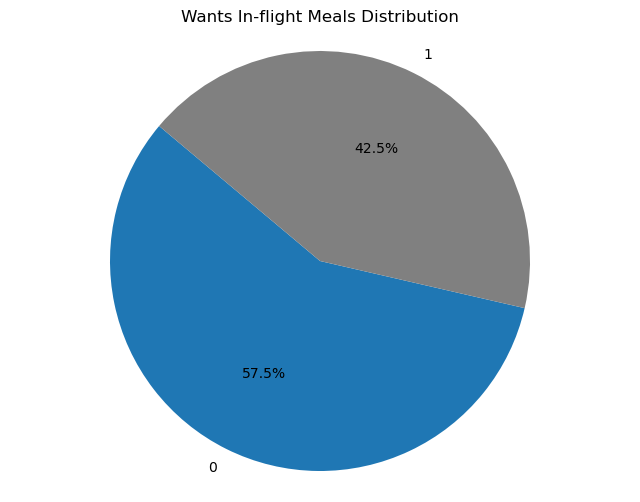

In [24]:
# Calculate the count of each wants in-flight meals category
in_flight_meals_counts = df['wants_in_flight_meals'].value_counts()

# Print the value counts
print("Wants In-flight Meals Value Counts:")
print(in_flight_meals_counts)

# Extract labels and sizes from the calculated data
labels = in_flight_meals_counts.index.tolist()
sizes = in_flight_meals_counts.values.tolist()

# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Ensuring the pie chart is a perfect circle
plt.title('Wants In-flight Meals Distribution')
plt.show()


### Route, Booking Origin

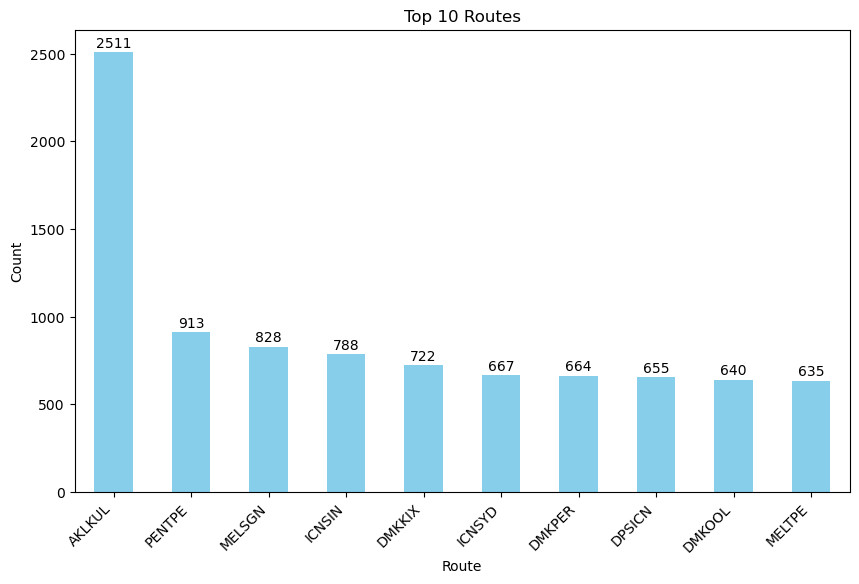

In [25]:
# Take the top 10 entries from the "route" column
route_counts = df['route'].value_counts()
top_10_routes = route_counts.head(10)

# Plotting the bar chart for top 10 routes
plt.figure(figsize=(10, 6))
top_10_routes.plot(kind='bar', color='skyblue')
plt.xlabel('Route')
plt.ylabel('Count')
plt.title('Top 10 Routes')

# Adding number labels on each bar
for i, count in enumerate(top_10_routes):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.show()


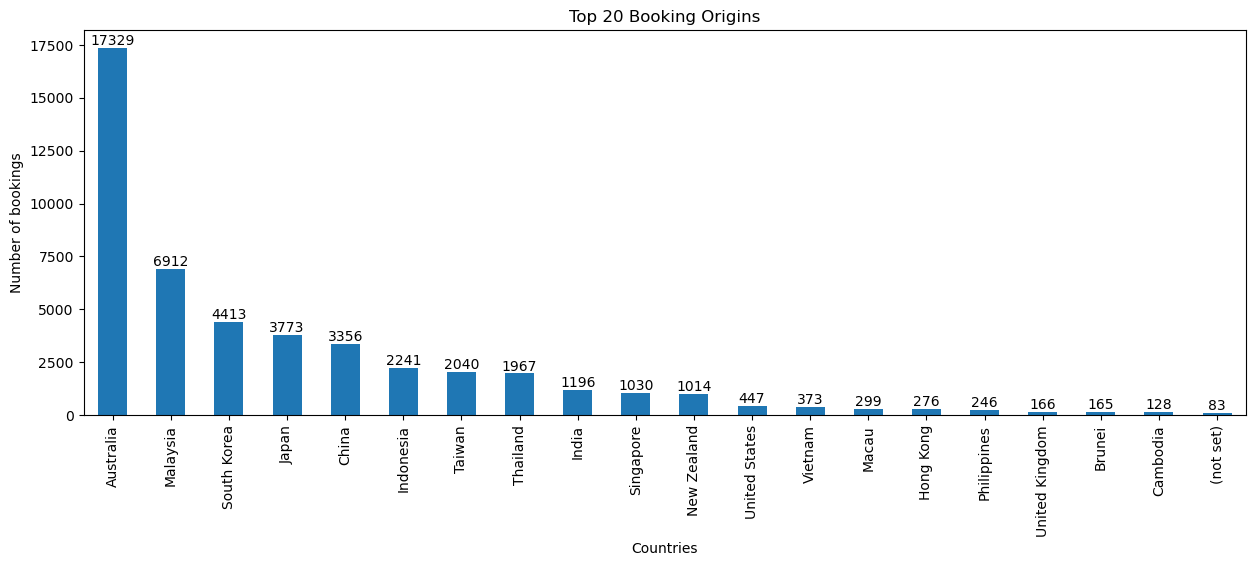

In [26]:
plt.figure(figsize=(15, 5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")
ax.set_title("Top 20 Booking Origins")

# Adding number labels on each bar
for i, count in enumerate(df.booking_origin.value_counts()[:20]):
    ax.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()


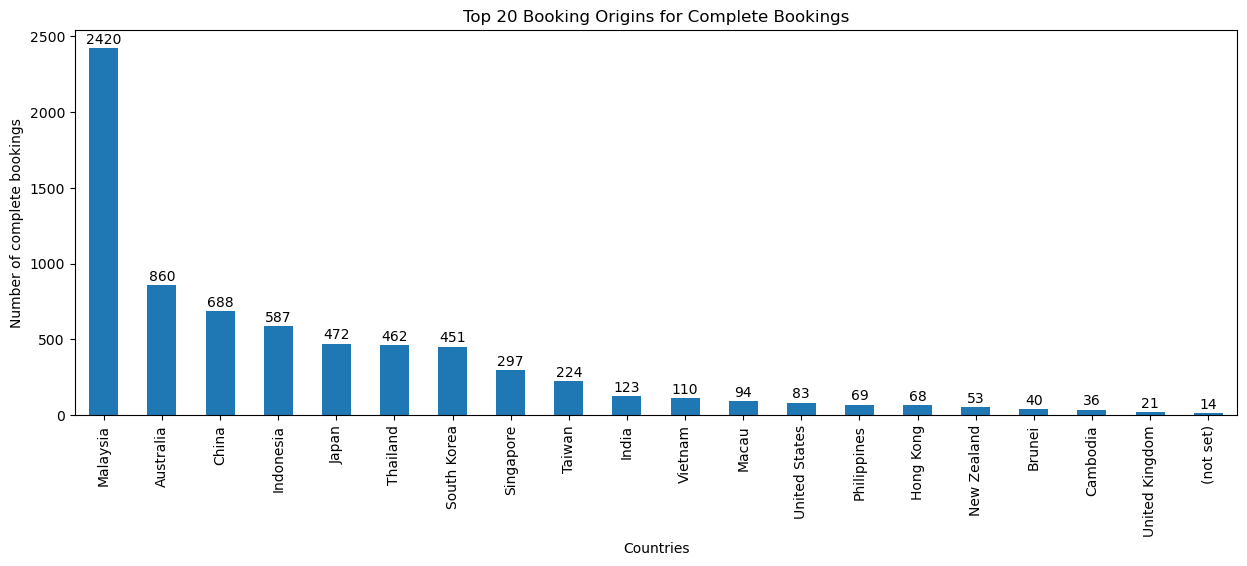

In [27]:
plt.figure(figsize=(15, 5))
ax = df[df.booking_complete == 1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")
ax.set_title("Top 20 Booking Origins for Complete Bookings")

# Adding number labels on each bar
for i, count in enumerate(df[df.booking_complete == 1].booking_origin.value_counts()[:20]):
    ax.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()


Above chart shows travellers from which country had their booking complete.  

### Booking Complete

In [28]:
# Calculate the count of each booking completion status category
booking_complete_counts = df['booking_complete'].value_counts()

# Print the value counts
print("Booking Completion Status Value Counts:")
print(booking_complete_counts)

# Extract labels and sizes from the calculated data
labels = booking_complete_counts.index.tolist()
sizes = booking_complete_counts.values.tolist()

# Print the percentages without pie chart
for label, size in zip(labels, sizes):
    percentage = (size / sum(sizes)) * 100
    print(f"{label}: {percentage:.1f}%")


Booking Completion Status Value Counts:
0    41105
1     7299
Name: booking_complete, dtype: int64
0: 84.9%
1: 15.1%


Out of 48.403 booking entries in the clean data, only 15.1% of bookings were successful or complete.

## Export the cleaned dataset

In [29]:
df.to_csv("C:/Data Science - British Airways/Data/customer_booking(cleaned).csv", index=False)